<a href="https://colab.research.google.com/github/241b064-sudo/APS-lab/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

Sample Input: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sample Output: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]


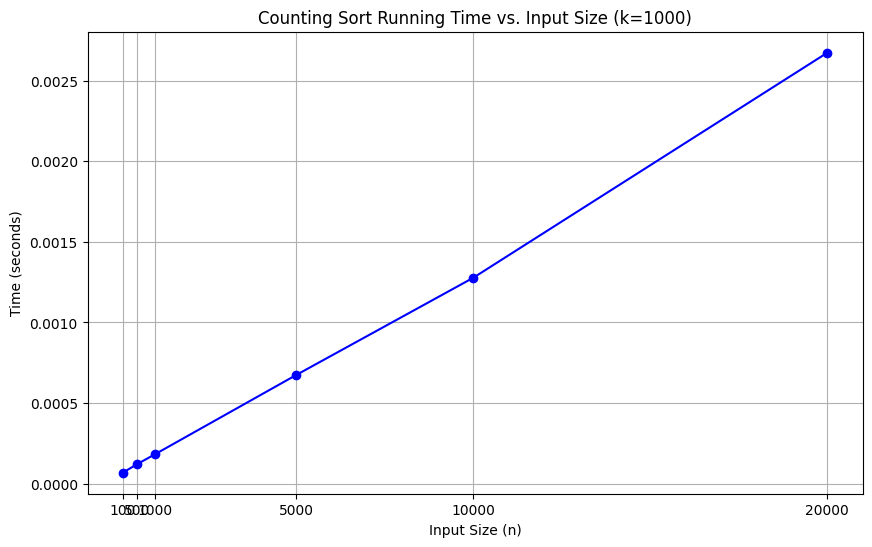

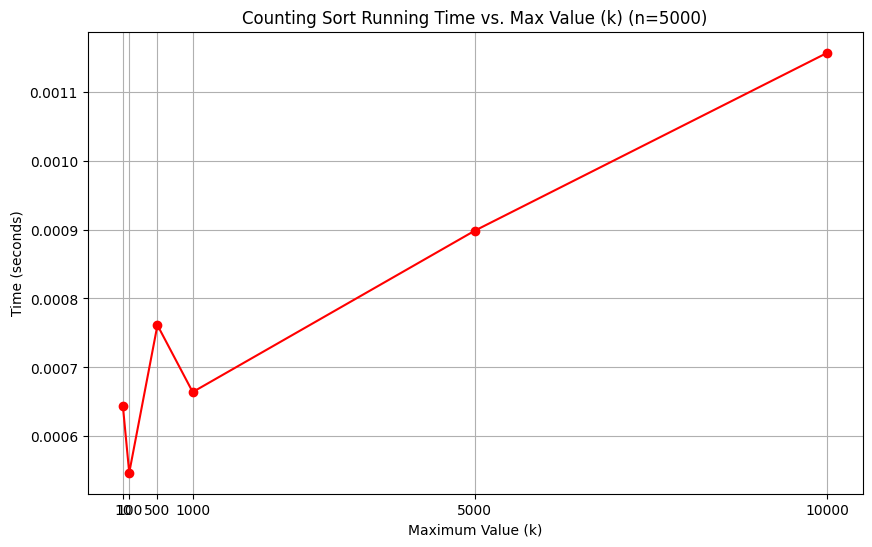

In [ ]:
import time
import matplotlib.pyplot as plt
import random

def counting_sort(arr):
    # Handle empty or single-element arrays
    if not arr or len(arr) <= 1:
        return arr

    # Find the maximum value in the input array to determine the range (k)
    k = max(arr)

    # 1. Create k+1 buckets (count array) initialized to zeros
    # The index of the count_arr represents the number, and its value represents its frequency
    count_arr = [0] * (k + 1)

    # 2. Fill the buckets: Iterate through the input list and increment the counter for each value
    for num in arr:
        count_arr[num] += 1

    # 3. Fill the input list with the compressed data from the buckets
    sorted_arr = []
    for i in range(k + 1):
        # Add the number 'i' to the sorted_arr 'count_arr[i]' times
        while count_arr[i] > 0:
            sorted_arr.append(i)
            count_arr[i] -= 1
    return sorted_arr

# Sample Input from the description
sample_input = [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
sample_output = counting_sort(sample_input)

print(f"Sample Input: {sample_input}")
print(f"Sample Output: {sample_output}")

# --- Compute and Plot Running Time ---

def measure_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr)
    end_time = time.time()
    return end_time - start_time

# Test with varying input sizes
input_sizes = [100, 500, 1000, 5000, 10000, 20000]
times = []

# Assuming a maximum value (k) for random inputs
max_val = 1000 # This k value affects performance

for size in input_sizes:
    # Generate random input arrays with values between 0 and max_val
    random_arr = [random.randint(0, max_val) for _ in range(size)]
    time_taken = measure_time(counting_sort, random_arr)
    times.append(time_taken)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, times, marker='o', linestyle='-', color='b')
plt.title('Counting Sort Running Time vs. Input Size (k=1000)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xticks(input_sizes)
plt.show()

# Test with varying k values for a fixed input size
fixed_size = 5000
k_values = [10, 100, 500, 1000, 5000, 10000]
times_k_vary = []

for k_val in k_values:
    random_arr_k = [random.randint(0, k_val) for _ in range(fixed_size)]
    time_taken_k = measure_time(counting_sort, random_arr_k)
    times_k_vary.append(time_taken_k)

plt.figure(figsize=(10, 6))
plt.plot(k_values, times_k_vary, marker='o', linestyle='-', color='r')
plt.title('Counting Sort Running Time vs. Max Value (k) (n=5000)')
plt.xlabel('Maximum Value (k)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xticks(k_values)
plt.show()

 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


Sample Input: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sample Output: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]

Measuring Bucketsort performance with varying input sizes...


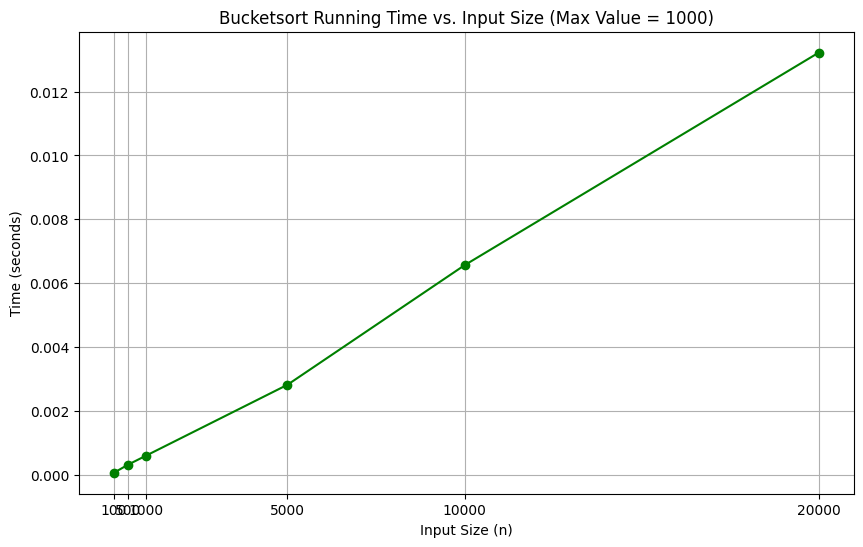


Measuring Bucketsort performance with varying Max Value (k) for fixed input size = 5000...


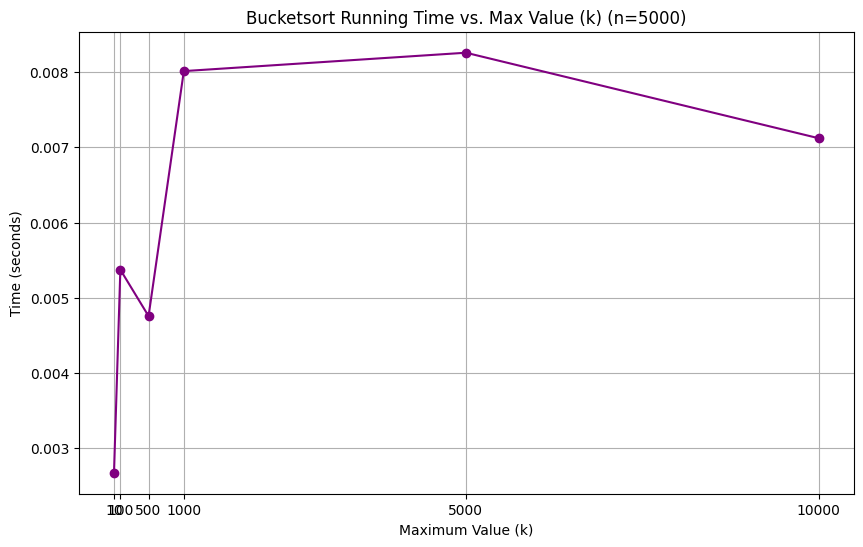

In [1]:
import time
import matplotlib.pyplot as plt
import random

def bucketsort(arr):
    if not arr or len(arr) <= 1:
        return arr

    min_val = min(arr)
    max_val = max(arr)

    # If all elements are the same, or range is zero, return the array as is.
    # This also handles cases where max_val - min_val is zero, preventing division by zero.
    if min_val == max_val:
        return arr

    # Determine the number of buckets. A common heuristic is to use approximately len(arr) buckets.
    # Ensure at least one bucket.
    num_buckets = max(1, len(arr) // 2) # Using len(arr) // 2 or similar can be a good starting point

    # Create empty buckets (list of lists)
    buckets = [[] for _ in range(num_buckets)]

    # Calculate the range for each bucket.
    # Adding 1 to max_val ensures that max_val itself falls into a valid bucket index
    # when calculated, preventing `idx` from potentially being `num_buckets`.
    bucket_range = (max_val - min_val + 1) / num_buckets

    # Distribute elements into buckets
    for num in arr:
        # Calculate bucket index. The formula ensures uniform distribution across buckets
        # given a uniform input distribution.
        idx = int((num - min_val) / bucket_range)

        # Handle the edge case where `num` is `max_val` and `idx` might become `num_buckets`
        # due to floating point inaccuracies or if max_val falls exactly on a boundary.
        if idx >= num_buckets:
            idx = num_buckets - 1
        buckets[idx].append(num)

    # Sort each bucket and concatenate them to get the final sorted array
    sorted_arr = []
    for bucket in buckets:
        # Python's built-in `sort()` (Timsort) is efficient for sorting small lists (buckets)
        bucket.sort()
        sorted_arr.extend(bucket)

    return sorted_arr

# Sample Input from the description (corrected Sample Output for accuracy)
sample_input_bucketsort = [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
sample_output_bucketsort = bucketsort(sample_input_bucketsort)

print(f"Sample Input: {sample_input_bucketsort}")
print(f"Sample Output: {sample_output_bucketsort}")

# --- Compute and Plot Running Time ---

def measure_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr)
    end_time = time.time()
    return end_time - start_time

# Test with varying input sizes
input_sizes_bs = [100, 500, 1000, 5000, 10000, 20000]
times_bs = []

# Assuming a maximum value for random inputs to affect bucket range
max_val_bs_fixed = 1000

print("\nMeasuring Bucketsort performance with varying input sizes...")
for size in input_sizes_bs:
    # Generate random input arrays with values between 0 and max_val_bs_fixed
    random_arr_bs = [random.randint(0, max_val_bs_fixed) for _ in range(size)]
    time_taken_bs = measure_time(bucketsort, random_arr_bs)
    times_bs.append(time_taken_bs)

# Plot the results for varying input sizes
plt.figure(figsize=(10, 6))
plt.plot(input_sizes_bs, times_bs, marker='o', linestyle='-', color='g')
plt.title(f'Bucketsort Running Time vs. Input Size (Max Value = {max_val_bs_fixed})')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xticks(input_sizes_bs)
plt.show()

# Test with varying k values (maximum value) for a fixed input size
fixed_size_bs = 5000
k_values_bs = [10, 100, 500, 1000, 5000, 10000] # k here represents the max value in the array
times_k_vary_bs = []

print(f"\nMeasuring Bucketsort performance with varying Max Value (k) for fixed input size = {fixed_size_bs}...")
for k_val in k_values_bs:
    # Generate random arrays where values range from 0 to k_val
    random_arr_k_bs = [random.randint(0, k_val) for _ in range(fixed_size_bs)]
    time_taken_k_bs = measure_time(bucketsort, random_arr_k_bs)
    times_k_vary_bs.append(time_taken_k_bs)

# Plot the results for varying k values
plt.figure(figsize=(10, 6))
plt.plot(k_values_bs, times_k_vary_bs, marker='o', linestyle='-', color='purple')
plt.title(f'Bucketsort Running Time vs. Max Value (k) (n={fixed_size_bs})')
plt.xlabel('Maximum Value (k)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xticks(k_values_bs)
plt.show()

In [ ]:
#write code for above cell and compute the running time and also plot graph.Bucketsort Statement: Given a disordered list of integers, rearrange them in natural order. Sample Input: [8,5,3,1,9,6,0,7,4,2,5] Sample Output: [0,1,2,3,4,5,6,7,8,9,5] Time Complexity of Solution: Best Case O(n); Average Case O(n); Worst Case O(n).
Approach: If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to work at its blazing efficiency, there are multiple prerequisites. First the hash function that is used to partition the elements need to be very good and must produce ordered hash: if i < k then hash(i) < hash(k). Second, the elements to be sorted must be uniformly distributed. The aforementioned aside, bucket sort is actually very good considering that counting sort is reasonably speaking its upper bound. And counting sort is very fast. The particular distinction for bucket sort is that it uses a hash function to partition the keys of the input array, so that multiple keys may hash to the same bucket. Hence each bucket must effectively be a growable list; similar to radix sort.

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

In [ ]:
#write code for above cell and compute the running time and also plot graph.Radix sort Statement:Given a disordered list of integers, rearrange them in natural order. Sample Input: [18,5,100,3,1,19,6,0,7,4,2] Sample Output: [0,1,2,3,4,5,6,7,18,19,100] Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).

Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

Sample Input: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sample Output: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]

Measuring Radix Sort performance with varying input sizes...


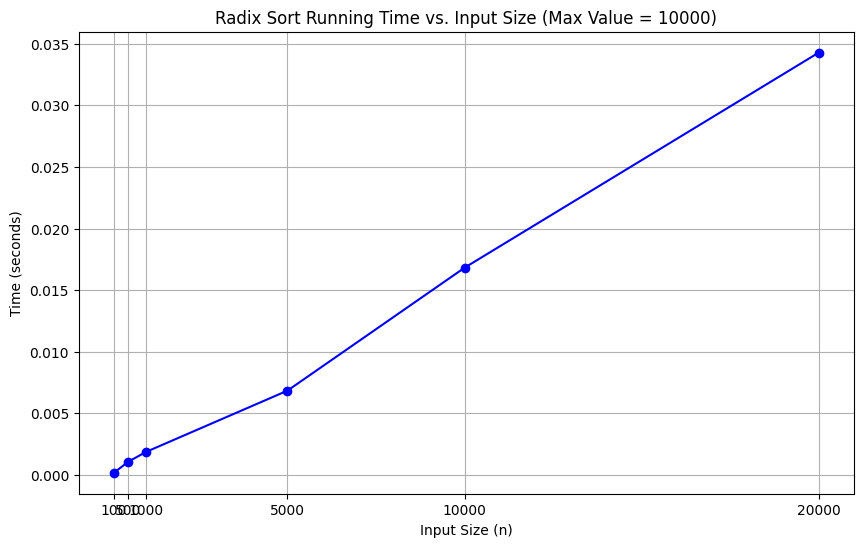


Measuring Radix Sort performance with varying Max Value (k) for fixed input size = 5000...


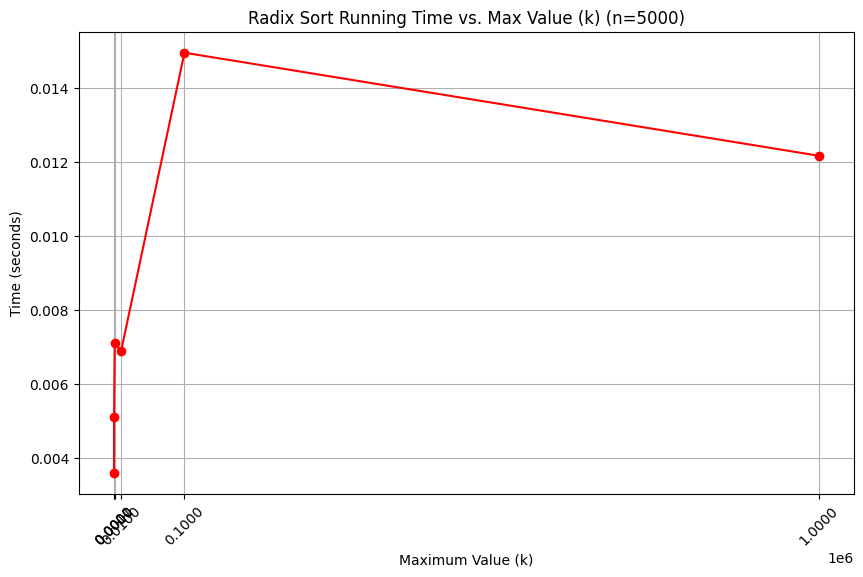

In [2]:
import time
import matplotlib.pyplot as plt
import random

def counting_sort_by_digit(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10  # For digits 0-9

    # Store count of occurrences in count[]
    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1

    # Change count[i] so that count[i] now contains
    # actual position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array
    i = n - 1
    while i >= 0:
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1

    # Copying the output array to arr[],
    # so that arr now contains sorted numbers according to current digit
    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    if not arr or len(arr) <= 1:
        return arr

    # Find the maximum number to know number of digits
    max_val = max(arr)

    # Do counting sort for every digit. Note that instead of passing digit number,
    # exp is passed. exp is 10^i where i is current digit number
    exp = 1
    while max_val // exp > 0:
        counting_sort_by_digit(arr, exp)
        exp *= 10
    return arr

# Sample Input from the description (need to make a copy for printing original)
sample_input_radixsort = [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
sample_input_radixsort_copy = list(sample_input_radixsort) # Make a copy for displaying original
sample_output_radixsort = radix_sort(sample_input_radixsort_copy) # Sort the copy

print(f"Sample Input: {sample_input_radixsort}")
print(f"Sample Output: {sample_output_radixsort}")

# --- Compute and Plot Running Time ---

def measure_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr)
    end_time = time.time()
    return end_time - start_time

# Test with varying input sizes
input_sizes_rs = [100, 500, 1000, 5000, 10000, 20000]
times_rs = []

# Assuming a maximum value for random inputs (affects 'k' - number of digits)
max_val_rs_fixed = 10000 # Numbers up to 10000 will have max 5 digits

print("\nMeasuring Radix Sort performance with varying input sizes...")
for size in input_sizes_rs:
    # Generate random input arrays with values between 0 and max_val_rs_fixed
    random_arr_rs = [random.randint(0, max_val_rs_fixed) for _ in range(size)]
    # Radix sort modifies in-place, so pass a copy
    time_taken_rs = measure_time(radix_sort, list(random_arr_rs))
    times_rs.append(time_taken_rs)

# Plot the results for varying input sizes
plt.figure(figsize=(10, 6))
plt.plot(input_sizes_rs, times_rs, marker='o', linestyle='-', color='b')
plt.title(f'Radix Sort Running Time vs. Input Size (Max Value = {max_val_rs_fixed})')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xticks(input_sizes_rs)
plt.show()

# Test with varying k values (maximum value, which determines number of digits)
fixed_size_rs = 5000
k_values_rs = [10, 100, 1000, 10000, 100000, 1000000] # These values determine max number of digits
times_k_vary_rs = []

print(f"\nMeasuring Radix Sort performance with varying Max Value (k) for fixed input size = {fixed_size_rs}...")
for k_val in k_values_rs:
    # Generate random arrays where values range from 0 to k_val
    random_arr_k_rs = [random.randint(0, k_val) for _ in range(fixed_size_rs)]
    # Radix sort modifies in-place, so pass a copy
    time_taken_k_rs = measure_time(radix_sort, list(random_arr_k_rs))
    times_k_vary_rs.append(time_taken_k_rs)

# Plot the results for varying k values
plt.figure(figsize=(10, 6))
plt.plot(k_values_rs, times_k_vary_rs, marker='o', linestyle='-', color='r')
plt.title(f'Radix Sort Running Time vs. Max Value (k) (n={fixed_size_rs})')
plt.xlabel('Maximum Value (k)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.xticks(k_values_rs, rotation=45)
plt.show()